## Simple Classification Project Using Random Forest and Decision Tree algorithms
## for kyphosis Dataset

### Import Packages 

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

### Import and Inspect Data

In [9]:
df = pd.read_csv('kyphosis.csv')

In [10]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [11]:
df.shape

(81, 4)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [14]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [20]:
df.duplicated().sum()

0

### EDA 

In [21]:
df.describe().round(1)

,Age,Number,Start
count,81.0,81.0,81.0
mean,83.7,4.0,11.5
std,58.1,1.6,4.9
min,1.0,2.0,1.0
25%,26.0,3.0,9.0
50%,87.0,4.0,13.0
75%,130.0,5.0,16.0
max,206.0,10.0,18.0


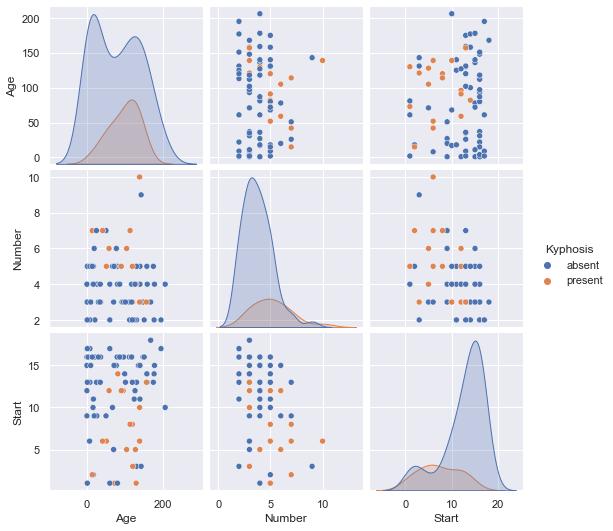

In [16]:
sns.pairplot(df,hue='Kyphosis')

<AxesSubplot: xlabel='Kyphosis', ylabel='count'>

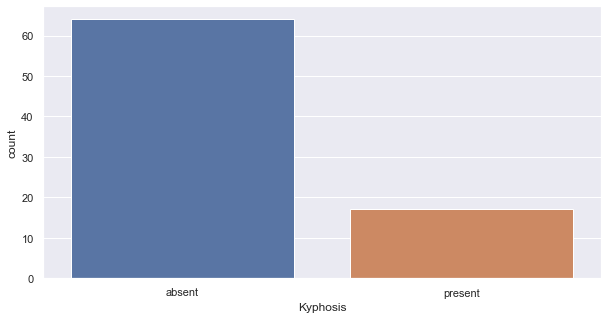

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(df,x='Kyphosis')

<AxesSubplot: xlabel='Age', ylabel='Density'>

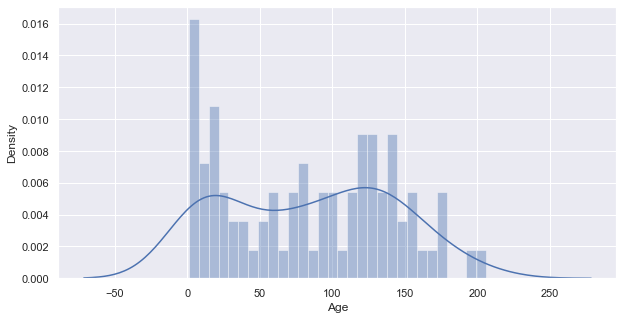

In [24]:
plt.figure(figsize=(10,5))
sns.distplot(df['Age'],bins=30)

<AxesSubplot: xlabel='Number', ylabel='Density'>

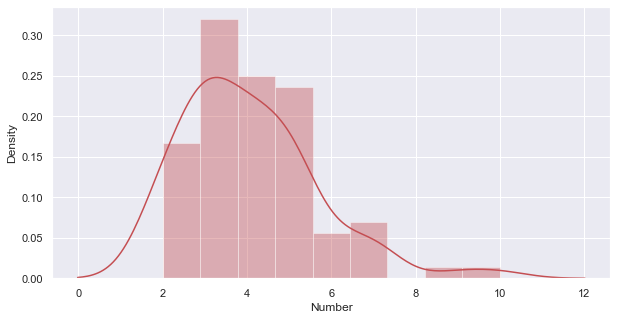

In [30]:
plt.figure(figsize=(10,5))
sns.distplot(df['Number'],color='r')

<AxesSubplot: xlabel='Start', ylabel='Density'>

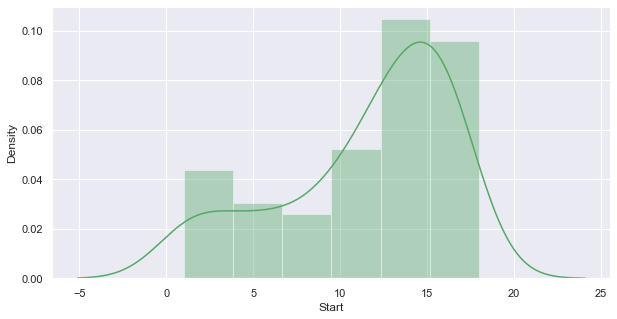

In [31]:
plt.figure(figsize=(10,5))
sns.distplot(df['Start'],color='g')

<AxesSubplot: xlabel='Kyphosis', ylabel='Age'>

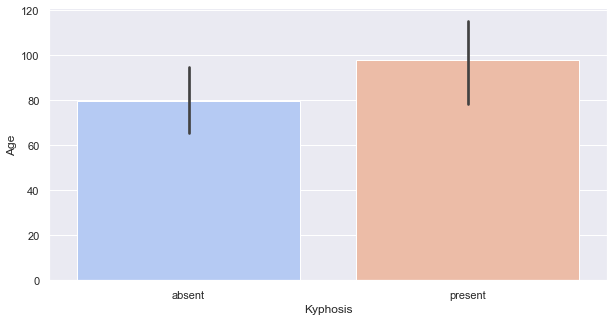

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Kyphosis',y='Age',palette='coolwarm')

<AxesSubplot: xlabel='Kyphosis', ylabel='Start'>

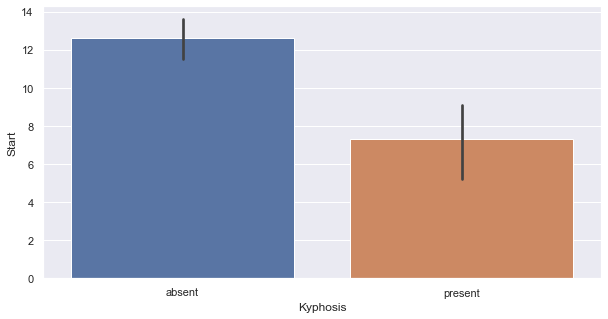

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Kyphosis',y='Start')

<AxesSubplot: >

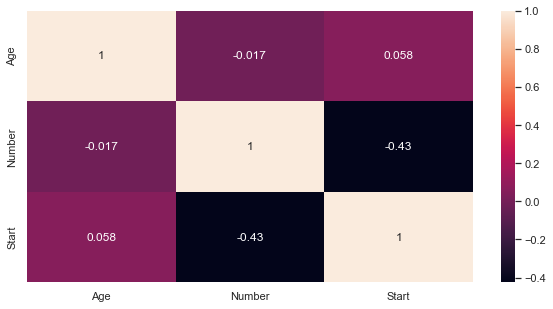

In [58]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

### Build , Train and Evaluate The Model

In [39]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Decision Tree Algorithm

In [43]:
DT = DecisionTreeClassifier()

In [44]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
pred_DT = DT.predict(X_test)

In [47]:
print(classification_report(pred_DT, y_test))

              precision    recall  f1-score   support

      absent       0.81      0.81      0.81        21
     present       0.33      0.33      0.33         6

    accuracy                           0.70        27
   macro avg       0.57      0.57      0.57        27
weighted avg       0.70      0.70      0.70        27



In [48]:
print(confusion_matrix(pred_DT, y_test))

[[17  4]
 [ 4  2]]


#### Random Forest Algorithm

In [52]:
RF = RandomForestClassifier(n_estimators=200)

In [53]:
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [55]:
pred_RF = RF.predict(X_test)

In [56]:
print(classification_report(pred_RF, y_test))

              precision    recall  f1-score   support

      absent       0.95      0.80      0.87        25
     present       0.17      0.50      0.25         2

    accuracy                           0.78        27
   macro avg       0.56      0.65      0.56        27
weighted avg       0.89      0.78      0.82        27



In [57]:
print(confusion_matrix(pred_RF, y_test))

[[20  5]
 [ 1  1]]


# 